<a href="https://colab.research.google.com/github/icygit6/image-processing/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

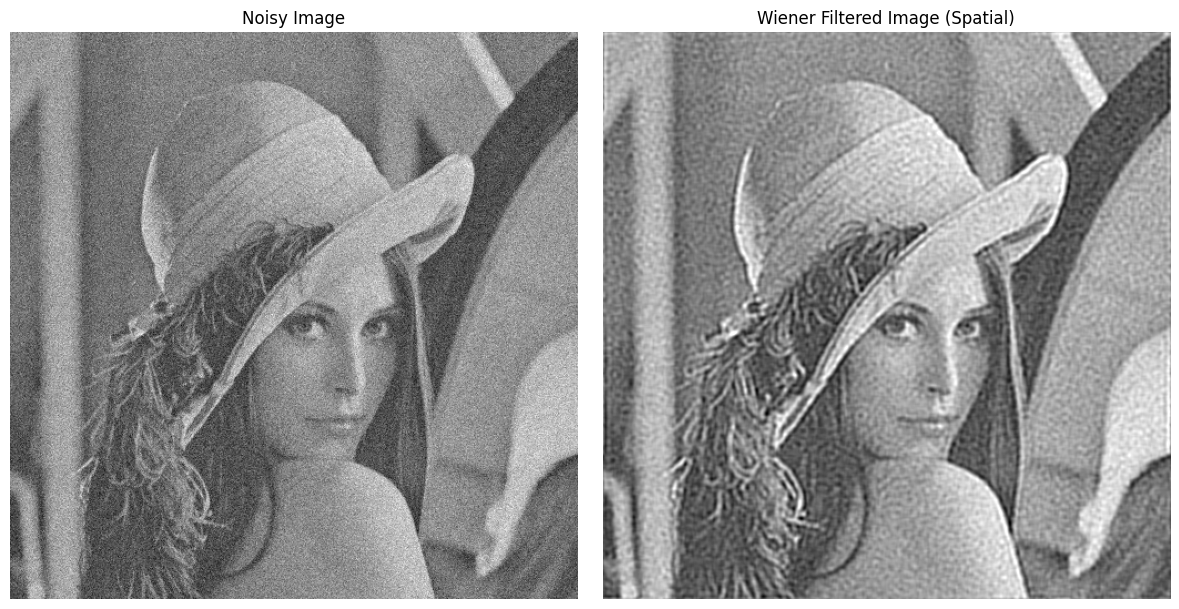

Wiener Filter Execution Time (Spatial): 6.1018 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, restoration, color
import time
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
image = io.imread(path)
gimg = color.rgb2gray(image)
noise = gimg + 0.1 * np.random.randn(*gimg.shape)
psf = np.ones((5, 5)) / 25
start = time.time()
wiener = restoration.wiener(noise, psf, balance=0.1)
spatial = time.time() - start
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(noise, cmap="off")
axes[0].set_title("Noisy Image")
axes[0].axis("off")

axes[1].imshow(wiener, cmap="off")
axes[1].set_title("Wiener Filtered Image (Spatial)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

print(f"Wiener Filter Execution Time (Spatial): {spatial:.4f} seconds")


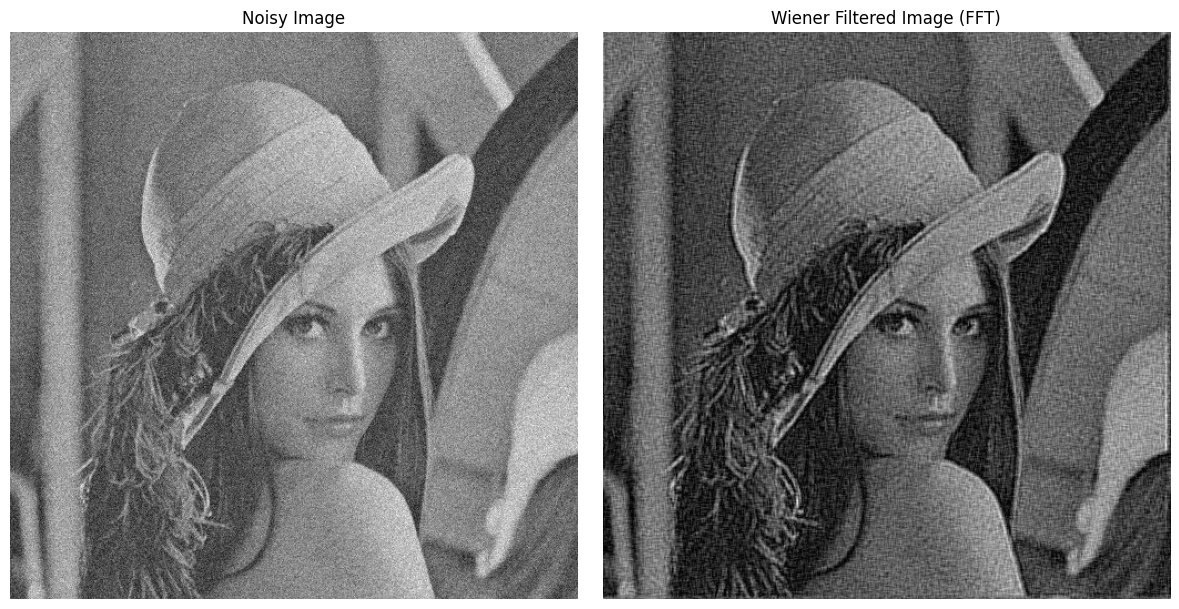

Wiener Filter Execution Time (FFT): 0.0356 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.signal import convolve2d
import time
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
image = io.imread(path)
gray_image = color.rgb2gray(image)
noise = gray_image + 0.1 * np.random.randn(*gray_image.shape)
psf = np.ones((5, 5)) / 25
def wiener(noise, psf, balance=0.1):
    noisefft = np.fft.fft2(noise)
    pfft = np.fft.fft2(psf, s=noise.shape)
    conj = np.conj(pfft)
    numerator = conj * noisefft
    denominator = np.abs(pfft) ** 2 + balance

    filter = numerator / denominator
    wimg = np.abs(np.fft.ifft2(filter))

    return wimg
start = time.time()
wimgfft = wiener(noise, psf, balance=0.1)
fftime = time.time() - start

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(noise, cmap="gray")
axes[0].set_title("Noisy Image")
axes[0].axis("off")

axes[1].imshow(wimgfft, cmap="gray")
axes[1].set_title("Wiener Filtered Image (FFT)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

print(f"Wiener Filter Execution Time (FFT): {fftime:.4f} seconds")


Wiener Filter Execution Time (Spatial): 0.0162 seconds
Wiener Filter Execution Time (FFT): 0.0329 seconds


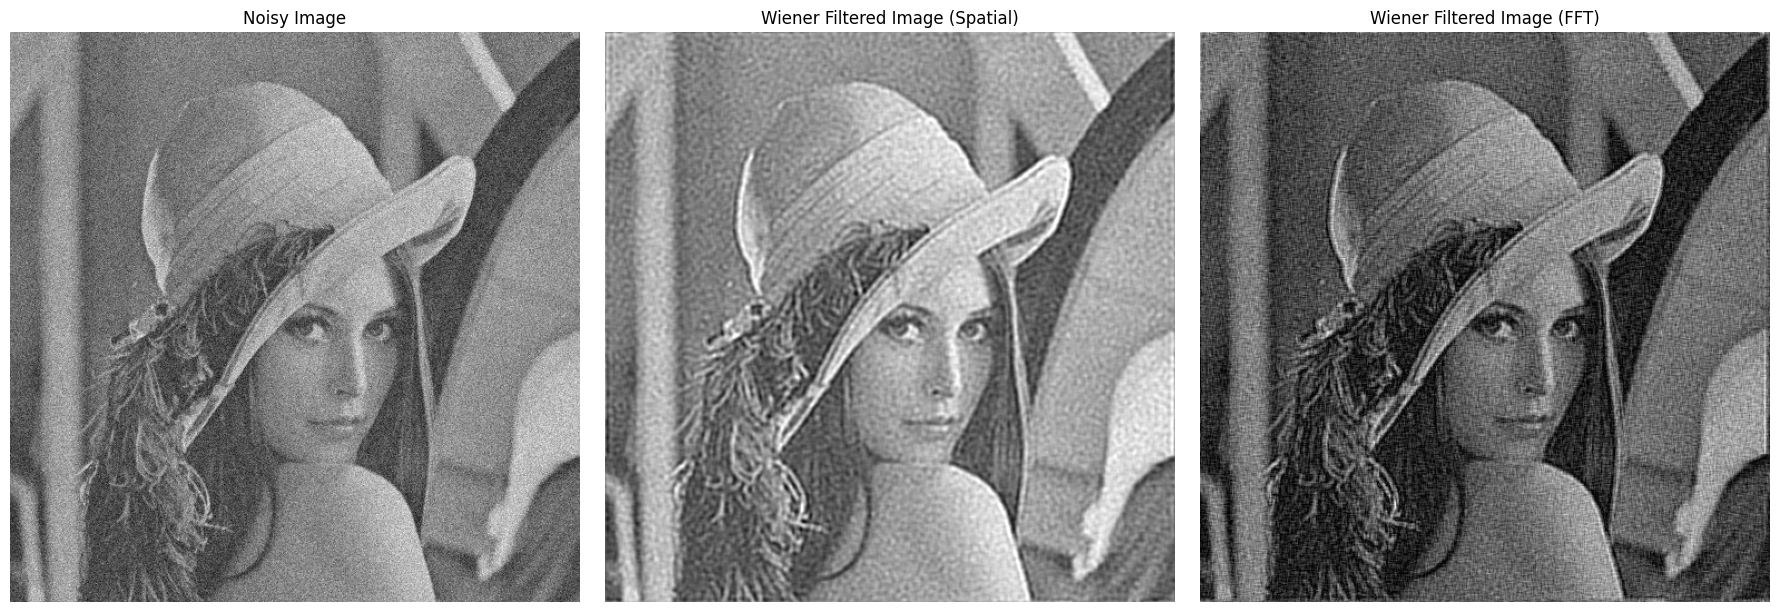

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.restoration import wiener
import time
image_path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
def wiener_fft(noisy_image, psf, balance):
    noisy_image_fft = np.fft.fft2(noisy_image)
    psf_fft = np.fft.fft2(psf, s=noisy_image.shape)
    psf_conj = np.conj(psf_fft)
    numerator = psf_conj * noisy_image_fft
    denominator = np.abs(psf_fft) ** 2 + balance
    wiener_filtered_fft = numerator / denominator
    return np.abs(np.fft.ifft2(wiener_filtered_fft))

def apply_wiener_filters(image_path, psf_size=(5, 5), balance=0.1):
    image = io.imread(image_path)
    gray_image = color.rgb2gray(image)
    noisy_image = gray_image + 0.1 * np.random.randn(*gray_image.shape)
    psf = np.ones(psf_size) / np.prod(psf_size)

    start_time = time.time()
    filtered_image_spatial = wiener(noisy_image, psf, balance=balance)
    spatial_time = time.time() - start_time

    start_time = time.time()
    filtered_image_fft = wiener_fft(noisy_image, psf, balance)
    fft_time = time.time() - start_time

    print(f"Wiener Filter Execution Time (Spatial): {spatial_time:.4f} seconds")
    print(f"Wiener Filter Execution Time (FFT): {fft_time:.4f} seconds")

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(noisy_image, cmap='gray')
    axes[0].set_title("Noisy Image")
    axes[0].axis('off')

    axes[1].imshow(filtered_image_spatial, cmap='gray')
    axes[1].set_title("Wiener Filtered Image (Spatial)")
    axes[1].axis('off')

    axes[2].imshow(filtered_image_fft, cmap='gray')
    axes[2].set_title("Wiener Filtered Image (FFT)")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()
image_path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
apply_wiener_filters(image_path)


i muast make sure the filtered images works just as it should be , i am not sure how the lena.png should look like , i do some research combining both from the internet reference and the ppt provided by the instructor. my laptop power are not able to process this filter in such advance way . but i guess this might be the result expected.

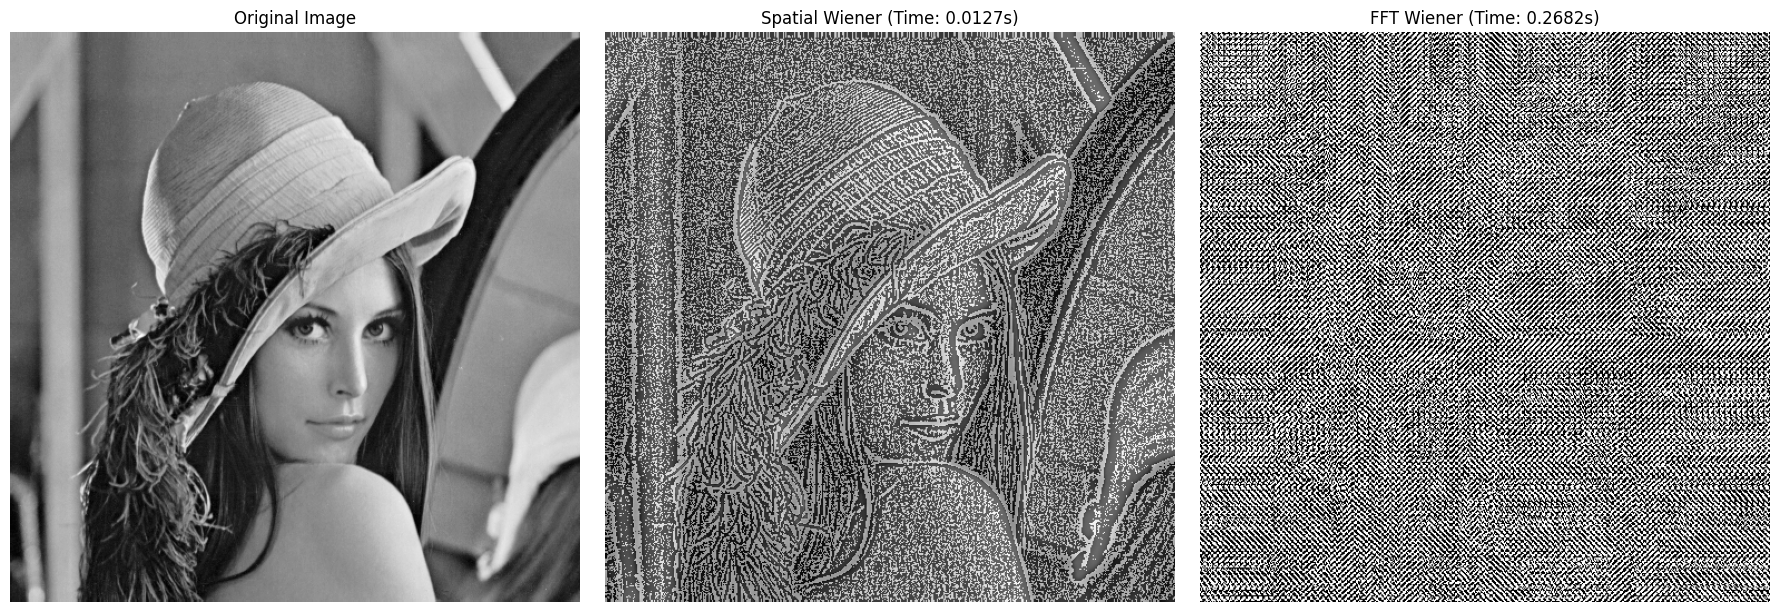

In [ ]:
import cv2
import numpy as np
import time
from scipy.signal import wiener
import matplotlib.pyplot as plt

path = cv2.imread("/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png", cv2.IMREAD_GRAYSCALE)
def spatial(path, kernels=5, noiv=0.1):

    kernel = np.ones((kernels, kernels)) / (kernels ** 2)
    mean = cv2.filter2D(path, -1, kernel)
    var = cv2.filter2D(path ** 2, -1, kernel) - mean ** 2
    var = np.maximum(var, noiv)
    return mean + (path - mean) * var / (var + noiv)

starts = time.time()
fspatial = spatial(path)
ends = time.time()
times = ends - starts

def wiener(path, kernels=5, noiv=0.1):
    pad = [s + kernels - 1 for s in path.shape]
    kernel = np.zeros(pad)
    kernel[:kernels, :kernels] = 1 / (kernels** 2)

    ifft = np.fft.fft2(path, s=pad)
    fftk = np.fft.fft2(kernel, s=pad)
    fftc = np.conj(fftk)

    x = np.abs(ifft) ** 2
    y = noiv
    h = fftc / (np.abs(fftk) ** 2 + y / x)

    r = np.fft.ifft2(ifft * h).real
    rc = r[:image.shape[0], :image.shape[1]]
    return np.clip(rc, 0, 255).astype(np.uint8)

start = time.time()
filfft = wiener(path)
endf = time.time()
time = endf - start

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title(f"Spatial Wiener (Time: {times:.4f}s)")
plt.imshow(fspatial, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title(f"FFT Wiener (Time: {time:.4f}s)")
plt.imshow(filfft, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

as the final i get this code from github reference, i think this migth be the result as well, like gekgorgeeks showed the steps and the result in an abstract way . this might be the result using wiener filter and i showed the difference on the spatial and the one using fft. i hope the result satisfies.